In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("All_Diets.csv")
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7800,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7801,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7802,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7803,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


In [3]:
def clean_string(input_string):
    input_string = re.sub(r"([a-zA-Z]+)'s", r'\1s', input_string)
    cleaned_string = re.sub(r'[^a-zA-Z\s]', ' ', input_string)
    words = [word.lower() for word in cleaned_string.split()]
    return " ".join(words)

df["Recipe_name"] = df["Recipe_name"].apply(clean_string)

In [4]:
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,bone broth from nom nom paleo,american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,paleo effect asian glazed pork sides a sweet c...,south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,paleo pumpkin pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,strawberry guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,asian cauliflower fried rice from nom nom paleo,chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7800,dash,brown butter sunchoke soup with brussels sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7801,dash,make your own salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7802,dash,luis bu uel dry martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7803,dash,cornflake semi fried chicken tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


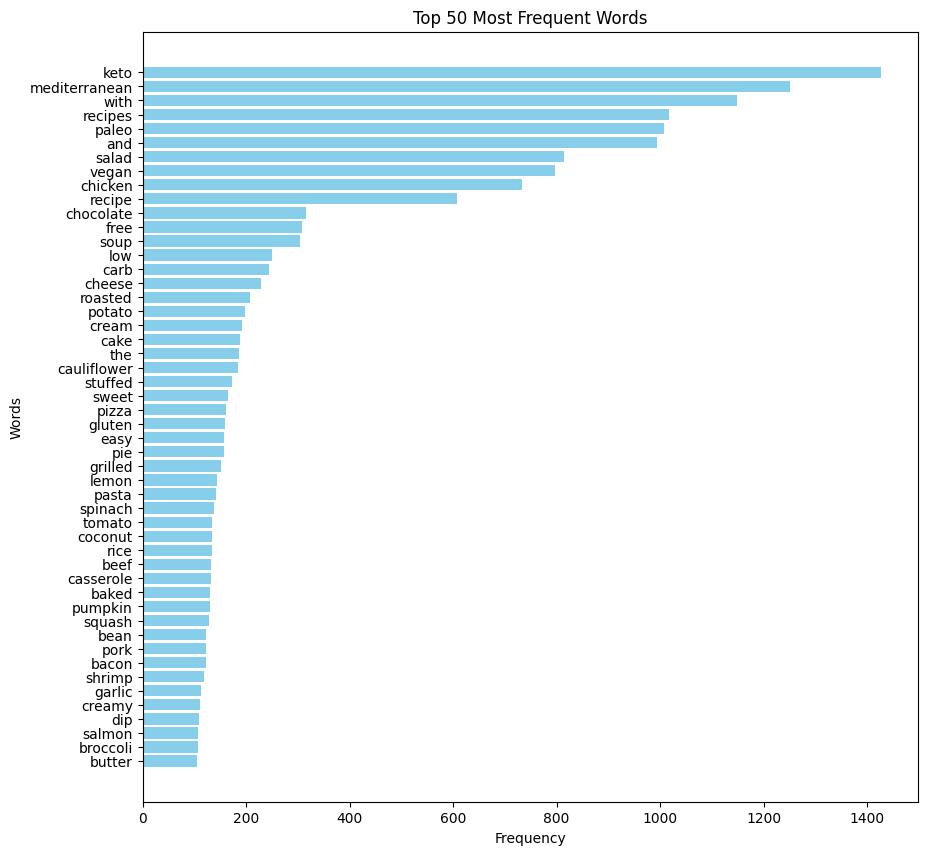

In [5]:
recipes = df["Recipe_name"]
recipes = recipes.to_numpy()
all_words = []
for recipe in recipes:
    all_words.extend(recipe.split())

words, counts = np.unique(all_words, return_counts=True)

indexes_most_frequent_words = np.argsort(counts)[::-1]
most_frequent_words = words[indexes_most_frequent_words[:50]]
most_frequent_counts = counts[indexes_most_frequent_words[:50]]
plt.figure(figsize=(10, 10))
plt.barh(most_frequent_words, most_frequent_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Frequent Words')
plt.gca().invert_yaxis()  
plt.show()

In [6]:
trash_words = set([word for word in "keto,mediterranean,recipes,recipe,easy,with,and,the,a,paleo".split(",")])

def remove_stopwords(input_string):
    words = [word for word in input_string.split() if word not in trash_words]
    return " ".join(words)

df["Recipe_name"] = df["Recipe_name"].apply(remove_stopwords)

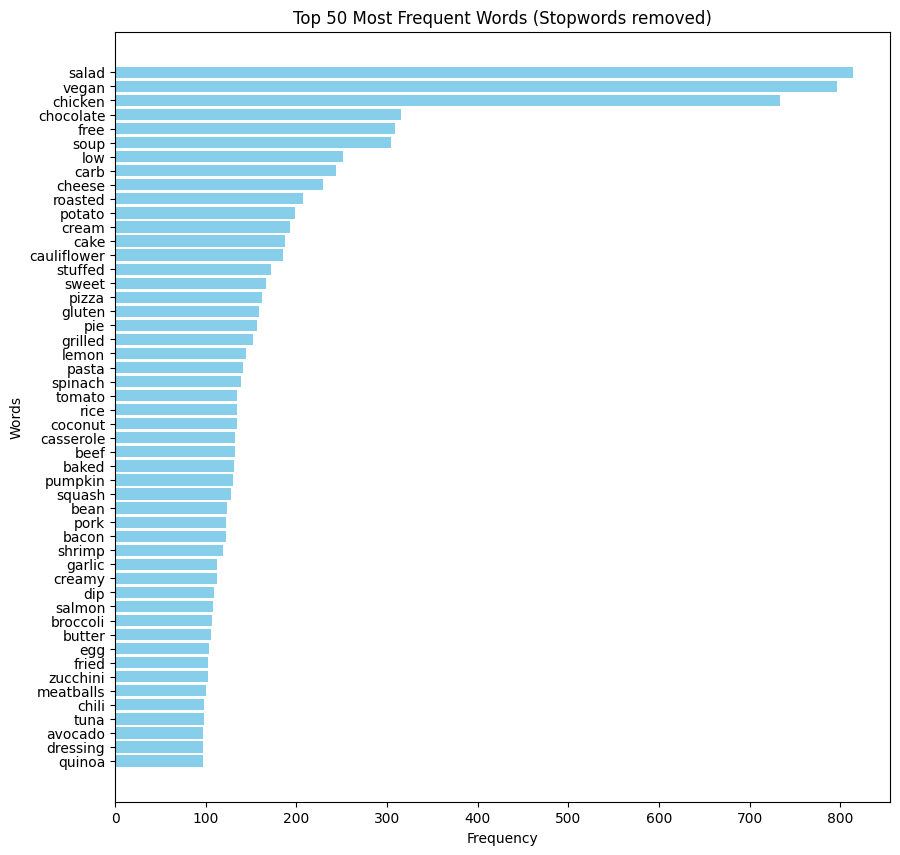

In [7]:
recipes = df["Recipe_name"]
recipes = recipes.to_numpy()
all_words = []
for recipe in recipes:
    all_words.extend(recipe.split())

words, counts = np.unique(all_words, return_counts=True)

indexes_most_frequent_words = np.argsort(counts)[::-1]
most_frequent_words = words[indexes_most_frequent_words[:50]]
most_frequent_counts = counts[indexes_most_frequent_words[:50]]
plt.figure(figsize=(10, 10))
plt.barh(most_frequent_words, most_frequent_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Frequent Words (Stopwords removed)')
plt.gca().invert_yaxis()  
plt.show()

In [8]:
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,bone broth from nom nom,american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,effect asian glazed pork sides sweet crispy ap...,south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,pumpkin pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,strawberry guacamole,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,asian cauliflower fried rice from nom nom,chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7800,dash,brown butter sunchoke soup brussels sprouts bacon,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7801,dash,make your own salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7802,dash,luis bu uel dry martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7803,dash,cornflake semi fried chicken tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


In [9]:
df = pd.get_dummies(df,columns=["Diet_type","Cuisine_type"])

In [10]:
df.to_csv("All_Diets_cleaned.csv",index=False)

In [11]:
df

,Recipe_name,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time,Diet_type_dash,Diet_type_keto,Diet_type_mediterranean,Diet_type_paleo,...,Cuisine_type_italian,Cuisine_type_japanese,Cuisine_type_kosher,Cuisine_type_mediterranean,Cuisine_type_mexican,Cuisine_type_middle eastern,Cuisine_type_nordic,Cuisine_type_south american,Cuisine_type_south east asian,Cuisine_type_world
0,bone broth from nom nom,5.22,1.29,3.20,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,effect asian glazed pork sides sweet crispy ap...,181.55,28.62,146.14,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,pumpkin pie,30.91,302.59,96.76,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,strawberry guacamole,9.62,75.78,59.89,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,asian cauliflower fried rice from nom nom,39.84,54.08,71.55,2022-10-16,17:20:09,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,brown butter sunchoke soup brussels sprouts bacon,85.20,288.14,137.15,2022-10-16,20:40:44,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7801,make your own salad,141.98,123.18,323.50,2022-10-16,20:40:44,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7802,luis bu uel dry martini,0.01,0.39,0.00,2022-10-16,20:40:44,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7803,cornflake semi fried chicken tenders,155.38,239.88,260.84,2022-10-16,20:40:44,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
